In [1]:
import pandas as pd
import numpy as np 
import scipy as sp
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [3]:
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

# Data Read In

In [4]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from urllib.request import urlopen

label = urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names").read().decode('utf-8')

In [7]:
label = label.split("7. Attribute information")[1]
label = label.split("Several of the papers")[0]

In [8]:
print(label)



1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)




In [9]:
import re

label = re.findall(r'\)\s{1}\w+\s{1}',label)
for i in range(len(label)):
    label[i] = label[i].split(" ")[1]
    label[i] = label[i].strip()

In [10]:
label[-1] = label[-1] + " dimension"
print(label)

['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave', 'symmetry', 'fractal dimension']


In [11]:
label2 = [i + "SE" for i in label][2:]
label3 = ["Wrost" + i for i in label][2:]

In [12]:
label = label + label2 + label3
print(label)

['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave', 'symmetry', 'fractal dimension', 'radiusSE', 'textureSE', 'perimeterSE', 'areaSE', 'smoothnessSE', 'compactnessSE', 'concavitySE', 'concaveSE', 'symmetrySE', 'fractal dimensionSE', 'Wrostradius', 'Wrosttexture', 'Wrostperimeter', 'Wrostarea', 'Wrostsmoothness', 'Wrostcompactness', 'Wrostconcavity', 'Wrostconcave', 'Wrostsymmetry', 'Wrostfractal dimension']


In [13]:
df.columns = label

In [14]:
df.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,...,Wrostradius,Wrosttexture,Wrostperimeter,Wrostarea,Wrostsmoothness,Wrostcompactness,Wrostconcavity,Wrostconcave,Wrostsymmetry,Wrostfractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
pd.set_option('display.max_columns', None)
df.describe()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concaveSE,symmetrySE,fractal dimensionSE,Wrostradius,Wrosttexture,Wrostperimeter,Wrostarea,Wrostsmoothness,Wrostcompactness,Wrostconcavity,Wrostconcave,Wrostsymmetry,Wrostfractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
corr = df.iloc[:,1:].corr()
corr

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concaveSE,symmetrySE,fractal dimensionSE,Wrostradius,Wrosttexture,Wrostperimeter,Wrostarea,Wrostsmoothness,Wrostcompactness,Wrostconcavity,Wrostconcave,Wrostsymmetry,Wrostfractal dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [17]:
import seaborn as sns

<AxesSubplot:>

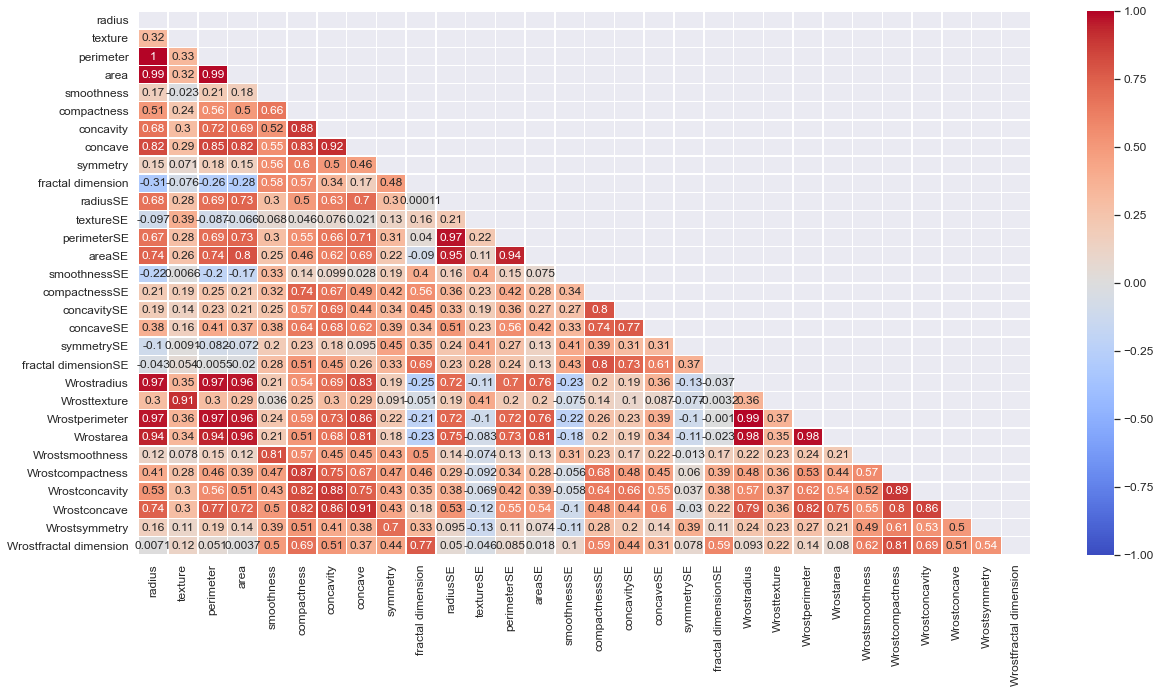

In [18]:
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(20,10)) 
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", annot=True, linewidths=0.5, mask = mask)

<Figure size 432x288 with 0 Axes>

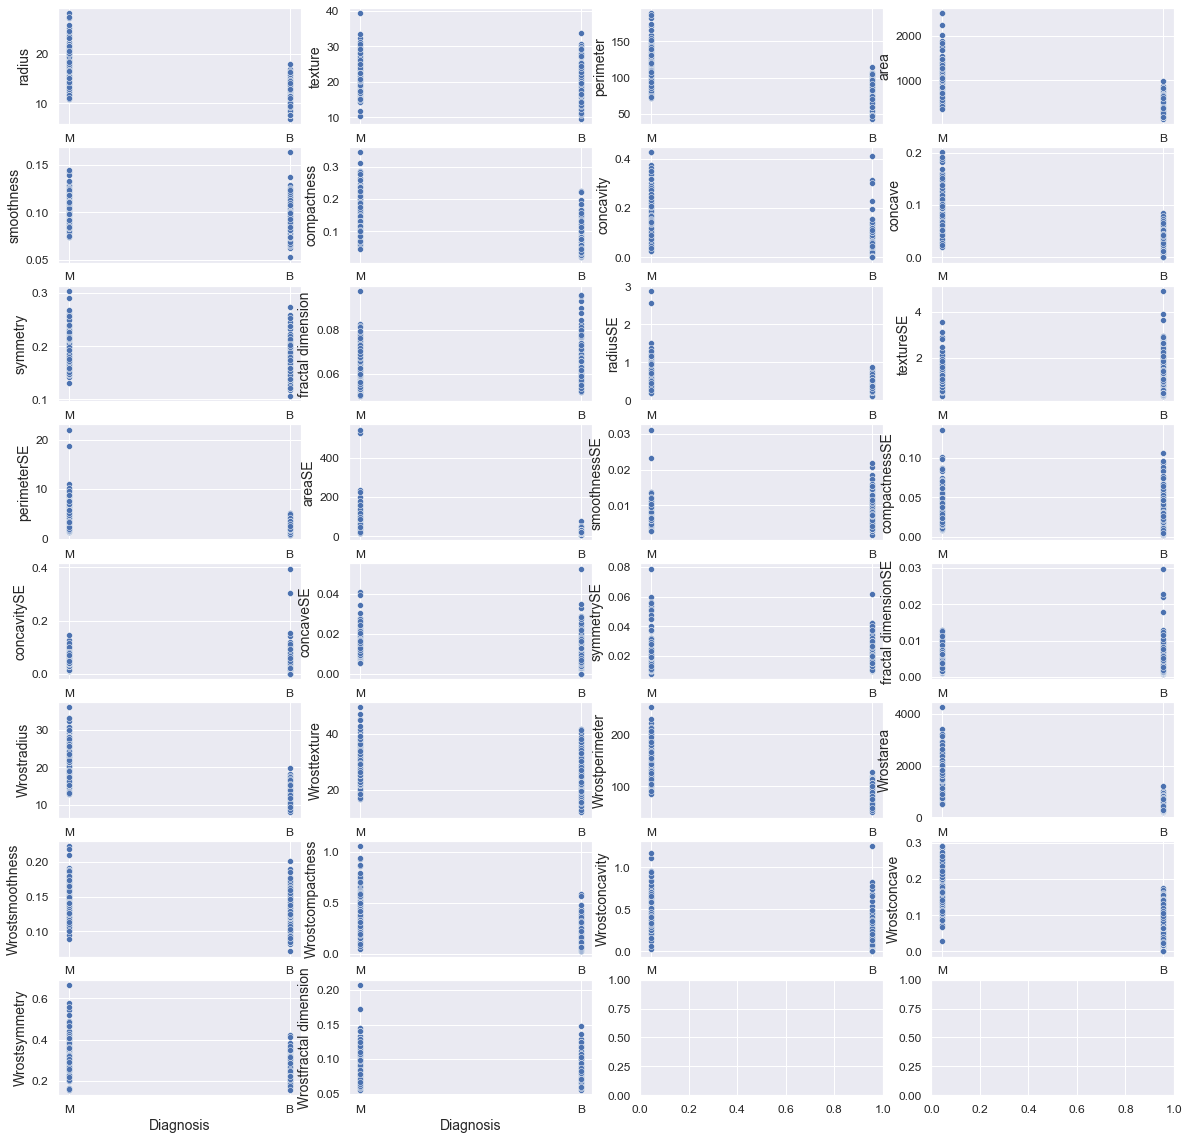

In [19]:
import warnings
warnings.filterwarnings("ignore")
plt.tight_layout()

num = range(2,len(df.columns))
fig, axes = plt.subplots(8,4,figsize=[20,20])
for i in num:
    col = (i-2) % 4
    row = (i-2) // 4
    sns.scatterplot("Diagnosis",df.columns[i],data = df, ax=axes[row,col])

# Predictive Modeling

## KNN

In [20]:
y = df.iloc[:,1]
y = y.to_frame()
x = df.iloc[:,2:]

In [21]:
from sklearn.model_selection import train_test_split

#Split Validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [22]:
print(y.groupby('Diagnosis').size())
print("B:M ratio is: ",round(y.groupby('Diagnosis').size()[0]/y.groupby('Diagnosis').size()[1],2),"\n")
print(y_train.groupby('Diagnosis').size())
print("B:M ratio is: ",round(y_train.groupby('Diagnosis').size()[0]/y_train.groupby('Diagnosis').size()[1],2),"\n")
print(y_test.groupby('Diagnosis').size())
print("B:M ratio is: ",round(y_test.groupby('Diagnosis').size()[0]/y_test.groupby('Diagnosis').size()[1],2))

Diagnosis
B    357
M    212
dtype: int64
B:M ratio is:  1.68 

Diagnosis
B    285
M    170
dtype: int64
B:M ratio is:  1.68 

Diagnosis
B    72
M    42
dtype: int64
B:M ratio is:  1.71


In [23]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(x_train) # Compute the mean and std to be used for later scaling.

x_train_std = sc.transform(x_train) # Perform standardization of train set X by centering and scaling
x_test_std = sc.transform(x_test) # Perform standardization of test set X by centering and scaling

In [24]:
from sklearn import neighbors
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

knn1 = neighbors.KNeighborsClassifier(n_neighbors=3, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.
knn1.fit(x_train_std, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(knn1, x_train, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.6263736263736264 accrate: 0.9208791208791208 error: 0.07912087912087912 
precision: 0.9294871794871795 recall: 0.8529411764705882 f_measure: 0.8895705521472392


In [26]:
print(tn + fp) # B is negative
print(fn + tp) # M is positive

285
170


In [27]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=3, #n_neighbors is the k in the kNN
                           p=1, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.
knn2.fit(x_train_std, y_train)  

KNeighborsClassifier(n_neighbors=3, p=1)

In [28]:
y_pred = cross_val_predict(knn2, x_train, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.6263736263736264 accrate: 0.9274725274725275 error: 0.07252747252747253 
precision: 0.9477124183006536 recall: 0.8529411764705882 f_measure: 0.8978328173374613


## Logit

In [29]:
from sklearn import linear_model        # The sklearn.linear_model module implements generalized linear models. LR is part of this module

In [30]:
clf1 = linear_model.LogisticRegression(multi_class='auto', #accomondates multi-class categorical target variable
                                      penalty = "l2", C=1e5)
clf1.fit(x_train, y_train)
print('The weights of the attributes are:', clf1.coef_)

The weights of the attributes are: [[-3.04310511 -0.04286669  0.48497248 -0.02155113  0.11784927  0.54901926
   0.78436644  0.33656062  0.16842999  0.03182634 -0.15715063 -1.27974205
  -0.46815625  0.12936762  0.01215532  0.11193527  0.15518273  0.0442639
   0.04860431  0.00966778 -3.17832643  0.32538699  0.151248    0.04534815
   0.2029197   1.66336943  2.07952296  0.62222003  0.58884081  0.16643869]]


In [31]:
y_pred = cross_val_predict(clf1, x_train, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.6263736263736264 accrate: 0.945054945054945 error: 0.054945054945054944 
precision: 0.9447852760736196 recall: 0.9058823529411765 f_measure: 0.924924924924925


In [32]:
clf2 = linear_model.LogisticRegression(multi_class='auto', #accomondates multi-class categorical target variable
                                      penalty = "l2", C=1)
clf2.fit(x_train_std, y_train)
print('The weights of the attributes are:', clf2.coef_)

The weights of the attributes are: [[ 0.46592488  0.38384413  0.44396402  0.4657848   0.01275596 -0.49021894
   0.80497667  0.96532754 -0.17787612 -0.20261647  1.15408453 -0.07240966
   0.71777877  0.82606646  0.3678653  -0.92025904 -0.21228221  0.31768357
  -0.21937296 -0.5389985   0.99909762  1.13910564  0.82427724  0.87276048
   0.743335    0.03885313  0.95093972  0.74982175  0.90194148  0.63152646]]


In [33]:
y_pred = cross_val_predict(clf2, x_train_std, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.6263736263736264 accrate: 0.9758241758241758 error: 0.024175824175824177 
precision: 0.9818181818181818 recall: 0.9529411764705882 f_measure: 0.9671641791044776


In [34]:
clf3 = linear_model.LogisticRegression(multi_class='auto', #accomondates multi-class categorical target variable
                                      penalty = "l1", C=10, solver = "saga")
clf3.fit(x_train_std, y_train)
print('The weights of the attributes are:', clf3.coef_)

The weights of the attributes are: [[ 0.57701948  0.59880902  0.55307177  0.58796277  0.11835798 -0.30131871
   0.73850133  0.8585737  -0.11804046 -0.31850343  1.1292371  -0.0486171
   0.78373246  0.85428563  0.29133072 -0.88131844 -0.06128348  0.19871632
  -0.26990512 -0.5646568   1.01386676  1.10055832  0.88423335  0.91420201
   0.93422502  0.10043736  0.89438774  0.8884249   0.92998565  0.46621869]]


In [35]:
y_pred = cross_val_predict(clf3, x_train_std, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.6263736263736264 accrate: 0.9736263736263736 error: 0.026373626373626374 
precision: 0.9817073170731707 recall: 0.9470588235294117 f_measure: 0.9640718562874251


# Evaluation

## 3NN (Manhattan) on Testset

In [44]:
y_pred = knn2.predict(x_test_std)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.631578947368421 accrate: 0.9473684210526315 error: 0.05263157894736842 
precision: 0.95 recall: 0.9047619047619048 f_measure: 0.9268292682926829


In [45]:
target = list(reversed(df['Diagnosis'].unique().tolist()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target))

[[70  2]
 [ 4 38]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Logit (Ridge) on Testset

In [39]:
y_pred = clf2.predict(x_test_std)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

error = (fp+fn)/(tn+fp+fn+tp)
accrate = (tn+tp)/(tn+fp+fn+tp) #accuracy_score(y_train, y_pred_insample)
precision = tp/(tp+fp) #precision_score(y_train, y_pred)
recall = tp/(tp+fn) #recall_score(y_train, y_pred)
f_measure = 2* (precision * recall) / (precision + recall) #f1_score(y_test, y_pred, average='macro')

if (tp + fn)>(fp + tn):
    naive = (tp + fn)/(tn+fp+fn+tp)
else:
    naive = (fp + tn)/(tn+fp+fn+tp)

print( "naive:", naive,"accrate:", accrate,"error:", error,"\nprecision:", 
      precision,"recall:", recall,"f_measure:", f_measure)

naive: 0.631578947368421 accrate: 0.9824561403508771 error: 0.017543859649122806 
precision: 0.9761904761904762 recall: 0.9761904761904762 f_measure: 0.9761904761904762


In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target))

[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

